# statical process

## import modules & load data

In [11]:
from lib.preprocess import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3
# Define column name of the label vector
LABEL = "ActivityEncoded"
# set random seed
SEED = 314

x_train, x_test, y_train, y_test = load_data(
    LABELS, TIME_PERIODS, STEP_DISTANCE, LABEL, N_FEATURES, SEED
)

/home/nakagawa/humanactivityrecognition_portfolio/lib/preprocess.py:42: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  label = stats.mode(df[label_name][i : i + time_steps], keepdims=True)[0][0]


In [13]:
inputs_list = list()
outputs_list = list()
index_axis = pd.timedelta_range(start=0, periods=80, freq="0.025S")
for data in x_train:
    inputs_list.append(pd.DataFrame(data, columns=["x", "y", "z"], index=index_axis))
for data in x_test:
    inputs_list.append(pd.DataFrame(data, columns=["x", "y", "z"], index=index_axis))
for data in y_train:
    outputs_list.append(pd.DataFrame(data, columns=["ActivityEncoded"]))
for data in y_test:
    outputs_list.append(pd.DataFrame(data, columns=["ActivityEncoded"]))
del x_train, x_test, y_train, y_test

# stationarity

## visualize stationarity

![stationarity](../assets/stationaly_fromKaggle.png)

(<Figure size 5000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'x'}, xlabel='Time', ylabel='Number of trips'>)

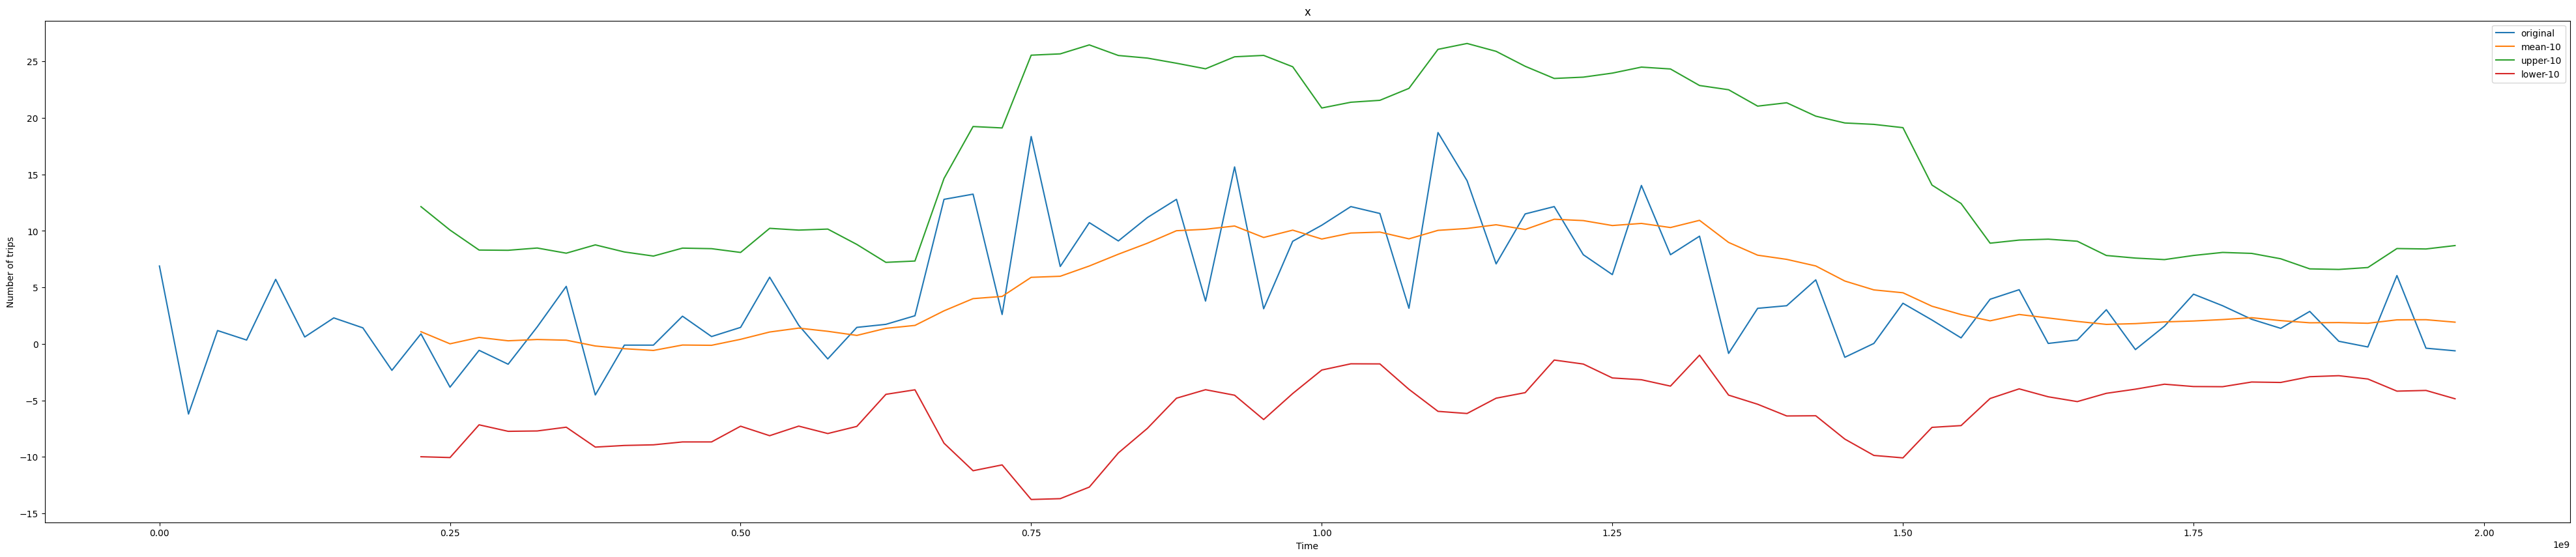

In [16]:
def plot_stationaly(inputs:pd.DataFrame, rolling_window:int):
    col = inputs.name
    input_df = pd.DataFrame(inputs, columns=[col])
    # caluc rollingmean
    input_df.loc[:,f"{col}-mean"] = input_df.loc[:,col].rolling(rolling_window).mean()
    # caluc rolling standard deviation
    input_df.loc[:,f"{col}-std"] = input_df.loc[:,col].rolling(rolling_window).std()
    # caluc upper and lower limit
    input_df.loc[:,f"{col}-upper"] = input_df.loc[:,f"{col}-mean"] + 3 * input_df.loc[:,f"{col}-std"]
    input_df.loc[:,f"{col}-lower"] = input_df.loc[:,f"{col}-mean"] - 3 * input_df.loc[:,f"{col}-std"]
    # drop outlier
    # input_df.loc[input_df.loc[:,col] > input_df.loc[:,f"{col}-upper"], col] = np.nan
    # input_df.loc[input_df.loc[:,col] < input_df.loc[:,f"{col}-lower"], col] = np.nan
    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(50, 10)
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of trips")
    ax.set_title(f"{col}")
    ax.plot(input_df.loc[:,col], label="original")
    ax.plot(input_df.loc[:,f"{col}-mean"], label=f"mean-{rolling_window}")
    ax.plot(input_df.loc[:,f"{col}-upper"], label=f"upper-{rolling_window}")
    ax.plot(input_df.loc[:,f"{col}-lower"], label=f"lower-{rolling_window}")
    ax.legend()
    return fig, ax

rolling_window = 10
input_df = inputs_list[1]
plot_stationaly(input_df.loc[:,"x"], rolling_window)

# conclusion
finally, we convinced that the data is not stationary.  
so, we can't use Linear model (AR, MA, ARMA, ARIMA, SARIMA, etc...)  
And, we should use non-linear model (LSTM, GRU, Transformer, etc...)